<a href="https://colab.research.google.com/github/KMMohiuddin/DATA_SCIENCE_Projects/blob/main/Image_Classification_Model_and_Predict_MNIST_Digits_using_Wide_and_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS424 Lab Assignments [MHS_Spring_23] 
##### Name: K M Mohiuddin
######  ID: 192-35-2894




```
🟢 Question 1
```

**Build an image classification model and predict MNIST Digits using Wide and Deep Neural Network. Your should use callback functions to implement early stopping and save the best model into appropriate format. Report the training and test accuracy and other evaluation metrics.** 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step


define the architecture of the Wide and Deep Neural Network.

In [ ]:
# Define the input layer
input_layer = Input(shape=(28, 28))

# Flatten the input
flatten_layer = keras.layers.Flatten()(input_layer)

# Define the wide branch
wide_branch = Dense(128, activation='relu')(flatten_layer)
wide_branch = Dense(64, activation='relu')(wide_branch)

# Define the deep branch
deep_branch = Dense(128, activation='relu')(flatten_layer)
deep_branch = Dense(128, activation='relu')(deep_branch)
deep_branch = Dense(64, activation='relu')(deep_branch)

# Concatenate the wide and deep branches
concat_layer = Concatenate()([wide_branch, deep_branch])

# Output layer
output_layer = Dense(10, activation='softmax')(concat_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)


setting up early stopping and model checkpoint callbacks to monitor the training and save the best model.

In [ ]:
# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])


In [ ]:
# Load the best model saved during training
best_model = keras.models.load_model('best_model.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

# Print the test accuracy
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0860 - accuracy: 0.9734
Test Accuracy: 0.9733999967575073


In [ ]:
# Generate predictions on the test data
predictions = best_model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = tf.argmax(y_test, axis=1)

# Calculate evaluation metrics
precision = tf.keras.metrics.Precision()(true_labels, predicted_labels)
recall = tf.keras.metrics.Recall()(true_labels, predicted_labels)
f1_score = 2 * ((precision * recall) / (precision + recall))

# Print evaluation metrics
print('Precision:', precision.numpy())
print('Recall:', recall.numpy())
print('F1 Score:', f1_score.numpy())


313/313 [==============================] - 1s 2ms/step
Precision: 0.9991111
Recall: 0.9968958
F1 Score: 0.9980022




```
🟢 Question 2:
```



**This time we used diffrent activation function like teanh, sigmoid insted of relu used before.**

In [ ]:
# Define the input layer
input_layer = Input(shape=(28, 28))

# Flatten the input
flatten_layer = keras.layers.Flatten()(input_layer)

# Define the wide branch with modified activation function and weight initialization
wide_branch = Dense(128, activation='tanh', kernel_initializer='glorot_uniform')(flatten_layer)
wide_branch = Dense(64, activation='tanh', kernel_initializer='glorot_uniform')(wide_branch)

# Define the deep branch with modified activation function and weight initialization
deep_branch = Dense(128, activation='sigmoid', kernel_initializer='he_uniform')(flatten_layer)
deep_branch = Dense(128, activation='sigmoid', kernel_initializer='he_uniform')(deep_branch)
deep_branch = Dense(64, activation='sigmoid', kernel_initializer='he_uniform')(deep_branch)

# Concatenate the wide and deep branches
concat_layer = Concatenate()([wide_branch, deep_branch])

# Output layer
output_layer = Dense(10, activation='softmax')(concat_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])


Epoch 1/20
374/375 [============================>.] - ETA: 0s - loss: 0.4235 - accuracy: 0.8845
Epoch 1: val_accuracy improved from -inf to 0.94025, saving model to best_model.h5
375/375 [==============================] - 5s 11ms/step - loss: 0.4228 - accuracy: 0.8847 - val_loss: 0.2163 - val_accuracy: 0.9402
Epoch 2/20
374/375 [============================>.] - ETA: 0s - loss: 0.1849 - accuracy: 0.9460
Epoch 2: val_accuracy improved from 0.94025 to 0.95517, saving model to best_model.h5
375/375 [==============================] - 5s 13ms/step - loss: 0.1848 - accuracy: 0.9461 - val_loss: 0.1576 - val_accuracy: 0.9552
Epoch 3/20
372/375 [============================>.] - ETA: 0s - loss: 0.1307 - accuracy: 0.9617
Epoch 3: val_accuracy improved from 0.95517 to 0.96308, saving model to best_model.h5
375/375 [==============================] - 4s 10ms/step - loss: 0.1306 - accuracy: 0.9616 - val_loss: 0.1287 - val_accuracy: 0.9631
Epoch 4/20
373/375 [============================>.] - ETA: 0s

In [ ]:
# Load the best model saved during training
best_model = keras.models.load_model('best_model.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

# Print the test accuracy
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9763
Test Accuracy: 0.9763000011444092


In [ ]:
# Generate predictions on the test data
predictions = best_model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = tf.argmax(y_test, axis=1)

# Calculate evaluation metrics
precision = tf.keras.metrics.Precision()(true_labels, predicted_labels)
recall = tf.keras.metrics.Recall()(true_labels, predicted_labels)
f1_score = 2 * ((precision * recall) / (precision + recall))

# Print evaluation metrics
print('Precision:', precision.numpy())
print('Recall:', recall.numpy())
print('F1 Score:', f1_score.numpy())

313/313 [==============================] - 1s 2ms/step
Precision: 0.9984481
Recall: 0.99855876
F1 Score: 0.9985034




```
🟢 Question 3
```



**let's experiment with different optimizers. We'll modify the optimizer used in the model and compile it before training.**



In [ ]:
# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Experiment with different optimizers
optimizers = ['sgd', 'rmsprop', 'adam', 'adagrad', 'adadelta', 'adamax', 'nadam']
Test_Accuracy=[];

for optimizer_name in optimizers:
    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    # Compile the model with the current optimizer
    optimizer = keras.optimizers.get(optimizer_name)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    print(f"Training model with optimizer: {optimizer_name}")
    history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])
    
    # Load the best model saved during training
    best_model = keras.models.load_model('best_model.h5')
    
    # Evaluate the model on the test data
    test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
    
    # store n Print the test accuracy
    Test_Accuracy.append(test_accuracy)
    print('Test Accuracy:', test_accuracy)
    print('------------------------------------')
print("Test Accuracies for Different Optimizers:")
for i in range(len(optimizers)):
    print(f"{optimizers[i]}: {Test_Accuracy[i]}")

Training model with optimizer: sgd
Epoch 1/20
373/375 [============================>.] - ETA: 0s - loss: 9.2262e-05 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.97775, saving model to best_model.h5
375/375 [==============================] - 5s 13ms/step - loss: 9.2070e-05 - accuracy: 1.0000 - val_loss: 0.1192 - val_accuracy: 0.9778
Epoch 2/20
375/375 [==============================] - ETA: 0s - loss: 9.1936e-05 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.97775
375/375 [==============================] - 3s 8ms/step - loss: 9.1936e-05 - accuracy: 1.0000 - val_loss: 0.1192 - val_accuracy: 0.9778
Epoch 3/20
369/375 [============================>.] - ETA: 0s - loss: 9.1475e-05 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.97775
375/375 [==============================] - 3s 9ms/step - loss: 9.1811e-05 - accuracy: 1.0000 - val_loss: 0.1192 - val_accuracy: 0.9778
Epoch 4/20
375/375 [==============================] - ETA: 0s - loss: 9.16



```
🟢 Question 4:
```



**This time implement different regularization methods such as L1, L2, and Dropout to reduce overfitting.**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define the input layer
input_layer = Input(shape=(28, 28))

# Flatten the input
flatten_layer = keras.layers.Flatten()(input_layer)

# Define the wide branch with L2 regularization
wide_branch = Dense(128, activation='tanh', kernel_regularizer=l2(0.01))(flatten_layer)
wide_branch = Dropout(0.5)(wide_branch)
wide_branch = Dense(64, activation='tanh', kernel_regularizer=l2(0.01))(wide_branch)
wide_branch = Dropout(0.5)(wide_branch)

# Define the deep branch with L1 regularization
deep_branch = Dense(128, activation='sigmoid', kernel_regularizer=l1(0.01))(flatten_layer)
deep_branch = Dropout(0.5)(deep_branch)
deep_branch = Dense(128, activation='sigmoid', kernel_regularizer=l1(0.01))(deep_branch)
deep_branch = Dropout(0.5)(deep_branch)
deep_branch = Dense(64, activation='sigmoid', kernel_regularizer=l1(0.01))(deep_branch)
deep_branch = Dropout(0.5)(deep_branch)

# Concatenate the wide and deep branches
concat_layer = Concatenate()([wide_branch, deep_branch])

# Output layer
output_layer = Dense(10, activation='softmax')(concat_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Set up early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# Load the best model saved during training
best_model = keras.models.load_model('best_model.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

# Print the test accuracy
print('Test Accuracy:', test_accuracy)


Epoch 1/20
371/375 [============================>.] - ETA: 0s - loss: 7.8904 - accuracy: 0.7650
Epoch 1: val_accuracy improved from -inf to 0.90767, saving model to best_model.h5
375/375 [==============================] - 6s 13ms/step - loss: 7.8172 - accuracy: 0.7662 - val_loss: 0.8511 - val_accuracy: 0.9077
Epoch 2/20
373/375 [============================>.] - ETA: 0s - loss: 0.9265 - accuracy: 0.8543
Epoch 2: val_accuracy did not improve from 0.90767
375/375 [==============================] - 6s 16ms/step - loss: 0.9258 - accuracy: 0.8545 - val_loss: 0.7427 - val_accuracy: 0.8974
Epoch 3/20
371/375 [============================>.] - ETA: 0s - loss: 0.8528 - accuracy: 0.8632
Epoch 3: val_accuracy did not improve from 0.90767
375/375 [==============================] - 4s 12ms/step - loss: 0.8528 - accuracy: 0.8629 - val_loss: 0.7015 - val_accuracy: 0.9050
Epoch 4/20
371/375 [============================>.] - ETA: 0s - loss: 0.8282 - accuracy: 0.8647
Epoch 4: val_accuracy improved from



```
🟢 Question 5:
```




Implementing ResNet-34 architecture from the scratch using Keras Sequential API. then train the network to predict on MNIST Fashion dataset. Evaluate model using appropriate metrics.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Add, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Expand dimensions for grayscale images
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define the Residual Block
def residual_block(x, filters, strides=1):
    shortcut = x
    
    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    
    # If the number of filters changes or the strides are greater than 1, apply a convolution to shortcut path
    if strides > 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    
    # Add the shortcut to the main path
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Build the ResNet-34 model
inputs = Input(shape=(28, 28, 1))
x = Conv2D(64, kernel_size=(7, 7), strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

x = residual_block(x, filters=64)
x = residual_block(x, filters=64)
x = residual_block(x, filters=64)

x = residual_block(x, filters=128, strides=2)
x = residual_block(x, filters=128)
x = residual_block(x, filters=128)
x = residual_block(x, filters=128)

x = residual_block(x, filters=256, strides=2)
x = residual_block(x, filters=256)
x = residual_block(x, filters=256)
x = residual_block(x, filters=256)
x = residual_block(x, filters=256)
x = residual_block(x, filters=256)

x = residual_block(x, filters=512, strides=2)
x = residual_block(x, filters=512)
x = residual_block(x, filters=512)

x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# Load the best model saved during training
best_model = keras.models.load_model('best_model.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

# Print the test accuracy
print('Test Accuracy:', test_accuracy)


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/20
375/375 [==============================] - ETA: 0s - loss: 0.4783 - accuracy: 0.8275
Epoch 1: val_accuracy improved from -inf to 0.61683, saving model to best_model.h5
375/375 [==============================] - 3224s 9s/step - loss: 0.4783 - accuracy: 0.8275 - val_loss: 1.1706 - val_accuracy: 0.6168
Epoch 2/20
375/375 [==============================] - ETA: 0s - loss: 0.3187 - accuracy: 0.8837
Epoch 2: val_accuracy improved from 0.61683 to 0.81575, saving model to best_model.h5
375/375 [==============================] - 3295s 9s/step - loss: 0.3187 - accuracy: 0.8837 - val_loss: 0.5929 - val_accuracy: 0.8158
Epoch 3/20
375/375 [==============================] - ETA: 0s - loss: 0.2821 - accuracy: 0.8961
Epoch 3: val_accuracy improved from 0.81575 to 0.82042, saving model to best_model.h5
375/375 [==============================] - 3570s 10s/step - loss: 0.2821 - accuracy: 0.8961 - val_loss: 0.5632 - val_accuracy: 0



```
🟢 Question 6 :
```
Now train the same dataset and the same ResNet-34, but use pre-trained weights. In other words, use transfer learning to train the same model and determine whether there is any improvement in training time, accuracy, or any other aspect.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Add
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Expand dimensions for grayscale images
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Preprocess the input data for transfer learning
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

# Load the pre-trained ResNet-50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(28, 28, 3))

# Add a new classification head on top of the pre-trained base model
x = base_model.output
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

# Create the transfer learning model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test accuracy
print('Test Accuracy:', test_accuracy)




```
🟢 Question 7:
```
Generate an artificial time series data and predict it using simple, deep Recurrent Neural Network, or LSTM cells


Epoch 1/20
25/25 [==============================] - 2s 9ms/step - loss: 0.1257
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 5/20
25/25 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 0.0158
Epoch 7/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0142
Epoch 8/20
25/25 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 9/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 10/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 11/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0137
Epoch 12/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0140
Epoch 13/20
25/25 [===========================

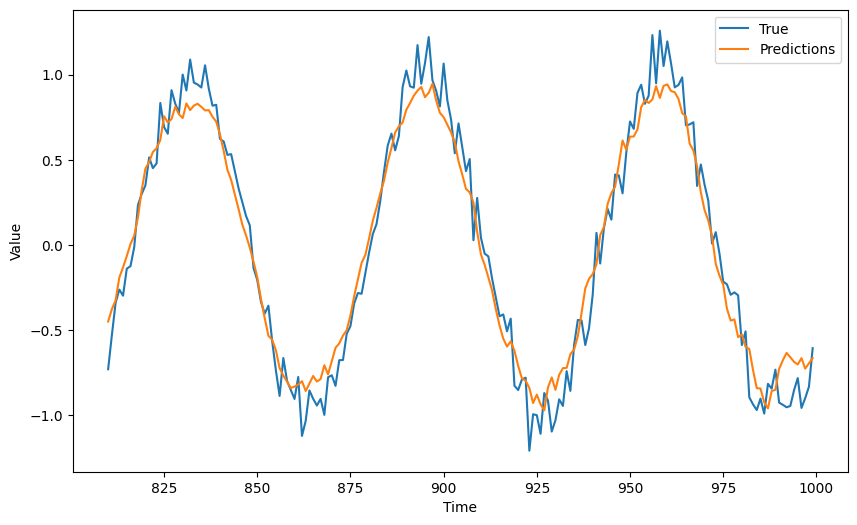

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate the artificial time series data
timesteps = 1000
time = np.arange(timesteps)
x = np.sin(0.1 * time) + np.random.normal(scale=0.1, size=timesteps)

# Split the data into training and test sets
train_ratio = 0.8
train_size = int(timesteps * train_ratio)

x_train, x_test = x[:train_size], x[train_size:]

# Define the input sequence length
sequence_length = 10

# Prepare the training data by creating input-output pairs
def prepare_data(data, sequence_length):
    x_data, y_data = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:i+sequence_length]
        y = data[i+sequence_length]
        x_data.append(x)
        y_data.append(y)
    return np.array(x_data), np.array(y_data)

x_train, y_train = prepare_data(x_train, sequence_length)
x_test, y_test = prepare_data(x_test, sequence_length)

# Reshape the data for RNN input [samples, timesteps, features]
x_train = np.reshape(x_train, (x_train.shape[0], sequence_length, 1))
x_test = np.reshape(x_test, (x_test.shape[0], sequence_length, 1))

# Build the deep RNN model
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(SimpleRNN(64))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(x_test, y_test)

# Generate predictions on the test data
predictions = model.predict(x_test)

# Plot the original data and the predictions
plt.figure(figsize=(10, 6))
plt.plot(time[train_size+sequence_length:train_size+sequence_length+len(predictions)], y_test, label='True')
plt.plot(time[train_size+sequence_length:train_size+sequence_length+len(predictions)], predictions.flatten(), label='Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()




```
🟢 Question 8:
```
Generate Shakespearean texts using Character Recurrent Neural Network. Develop the training dataset by splitting and chopping the training texts. Then develop a Char-RNN model to generate fake Shakespearean texts.

In [ ]:
import tensorflow as tf
import numpy as np

# Load the Shakespearean text
path_to_file = "shakespeare_data.txt"
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# Get unique characters in the text
vocab = sorted(set(text))

# Create mapping from characters to indices and vice versa
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

# Convert the text to a numerical representation
text_as_int = np.array([char2idx[c] for c in text])

# Define the input and target sequences for training
seq_length = 100  # Length of the input sequence
examples_per_epoch = len(text) // (seq_length + 1)

char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

# Batch size for training
BATCH_SIZE = 64
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Define the Char-RNN model
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size, None]),
        tf.keras.layers.GRU(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model

model = build_model(vocab_size=vocab_size, embedding_dim=embedding_dim, rnn_units=rnn_units, batch_size=BATCH_SIZE)

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

# Function to generate text using the trained model
def generate_text(model, start_string):
    num_generate = 1000
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []

    model.reset_states()
    for _ in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

# Train the model
history = model.fit(dataset, epochs=10)

# Generate text using the trained model
generated_text = generate_text(model, start_string='ROMEO: ')

print(generated_text)




```
🟢 Question 9:
```
Download the IMBD dataset and perform a sentiment analysis on the movie reviews. You can use pre-trained embeddings if you want. 


In [10]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB movie reviews dataset
max_features = 10000  # Maximum number of words to keep in the vocabulary
maxlen = 200  # Maximum length of a review (in words)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to have the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define the model architecture
model = Sequential()
model.add(Embedding(max_features, 100, input_length=maxlen))  # Embedding layer using pre-trained word embeddings
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
552/782 [====================>.........] - ETA: 2:16 - loss: 0.4975 - accuracy: 0.7673

KeyboardInterrupt: ignored